In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [73]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16,12)

In [86]:
# read data
df = pd.read_csv('movies.csv')

In [87]:
# look into data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# missing data?
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
# data type for out column
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# change data tyoe of columns


In [14]:
df['released'].astype(str)

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

In [35]:
rel_listed = df['released'].str.split()
rel_listed

0          [June, 13,, 1980, (United, States)]
1           [July, 2,, 1980, (United, States)]
2          [June, 20,, 1980, (United, States)]
3           [July, 2,, 1980, (United, States)]
4          [July, 25,, 1980, (United, States)]
                         ...                  
7663    [October, 23,, 2020, (United, States)]
7664    [February, 7,, 2020, (United, States)]
7665            [April, 27,, 2020, (Cameroon)]
7666     [October, 1,, 2020, (United, States)]
7667     [August, 19,, 2020, (United, States)]
Name: released, Length: 7668, dtype: object

In [43]:
released_year = []
for value in rel_listed: 
    try:
        released_year.append(value[2])
    except:
        released_year.append(0)

In [45]:
# create correct year column
df['released_year'] = released_year

In [46]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [47]:
# Move year column to the end to compare with released_year
cols_at_end = ['year']
df = df[[c for c in df if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df]]

In [53]:
# change data type of budget and gross
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')

In [88]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [63]:
pd.set_option('display.min_rows', 15)

In [65]:
# Budget high correlation
# company high correlation

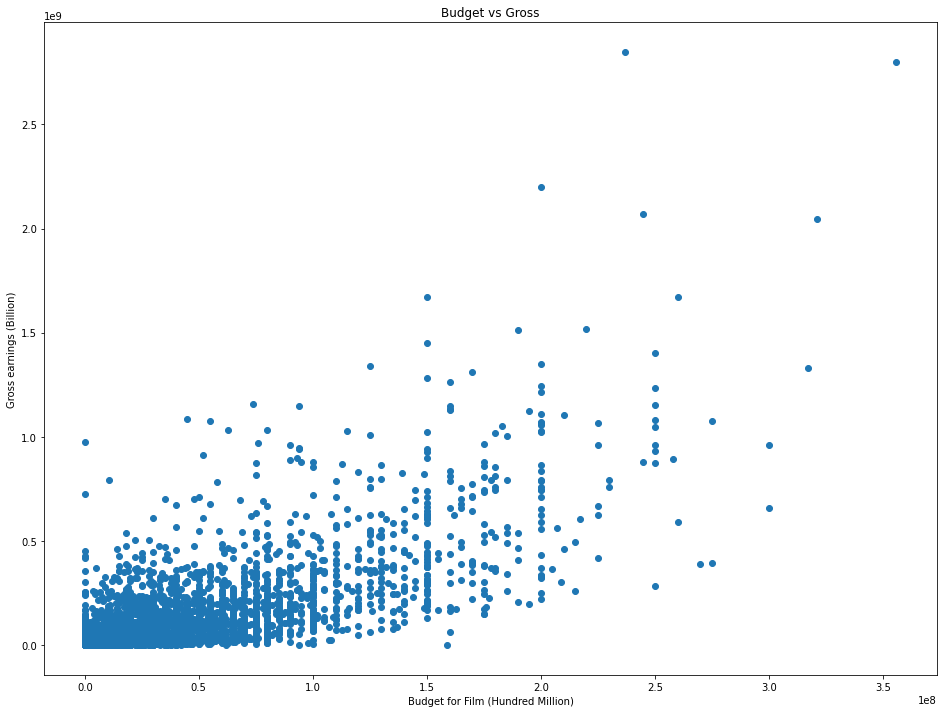

In [75]:
# scatter plot with budget and gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget for Film (Hundred Million)')
plt.ylabel('Gross earnings (Billion)')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

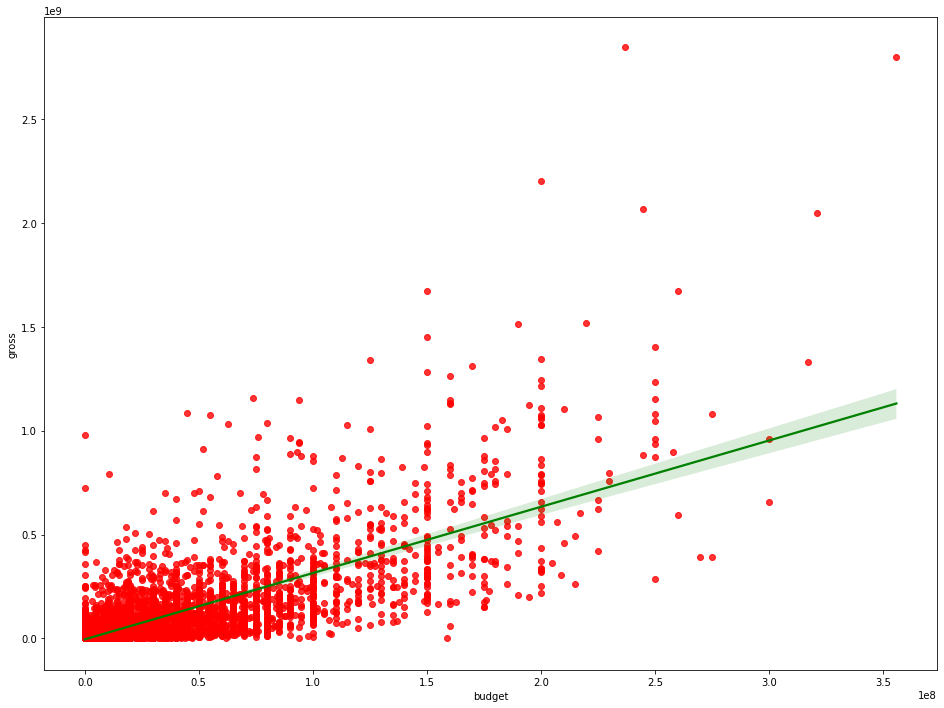

In [77]:
# plot budget vs gross by seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"green"})

In [78]:
# looking at correlation
df.corr()

,score,votes,budget,gross,runtime,year
score,1.000000,0.409182,0.055665,0.186392,0.399451,0.097995
votes,0.409182,1.000000,0.486862,0.632834,0.309212,0.222945
budget,0.055665,0.486862,1.000000,0.750157,0.269510,0.309212
gross,0.186392,0.632834,0.750157,1.000000,0.245235,0.261900
runtime,0.399451,0.309212,0.269510,0.245235,1.000000,0.120811
year,0.097995,0.222945,0.309212,0.261900,0.120811,1.000000


Text(123.0, 0.5, 'Movie Features')

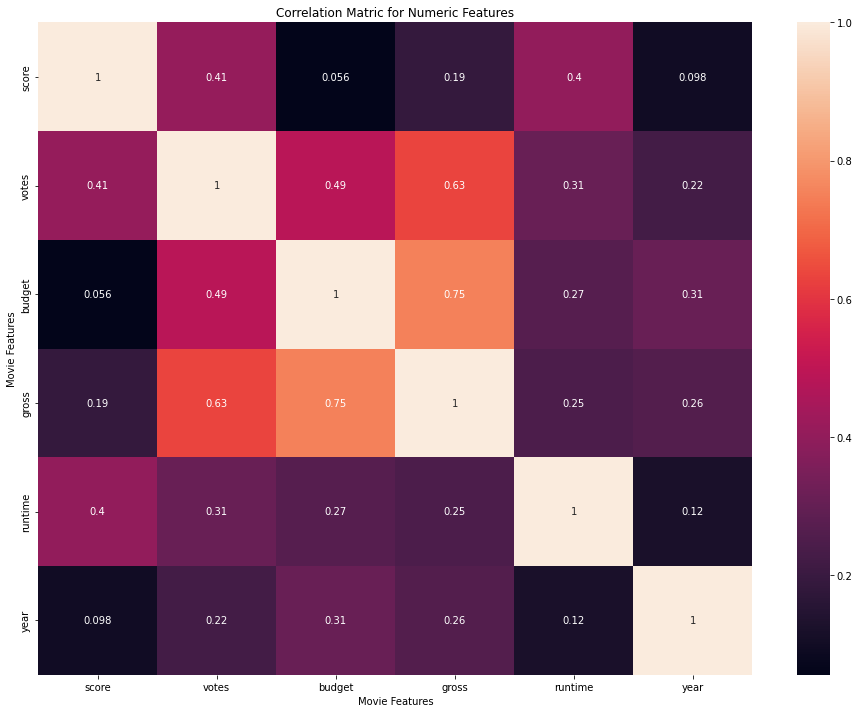

In [81]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


In [83]:
# look at company
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,2018


In [84]:
df_numerized = df 

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

df_numerized

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,year
5445,533,5,0,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,32,2009
7445,535,5,0,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,42,2019
3045,6896,5,6,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,20,1997
6663,5144,5,0,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,38,2015
7244,536,5,0,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,41,2018
7480,6194,4,2,1488,6.9,222000.0,1455,1919,676,55,260000000,1670727580,2316,118.0,42,2019
6653,2969,5,0,1704,7.0,593000.0,517,3568,437,55,150000000,1670516444,2281,124.0,38,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,1925,5,4,194,4.5,653.0,1881,3857,480,55,0,0,879,92.0,12,1989
1629,4582,6,0,3327,4.3,1100.0,2631,144,1857,55,0,0,470,107.0,12,1989


In [89]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000.0,1.670516e+09,Universal Pictures,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0


Text(122.09375, 0.5, 'Movie Features')

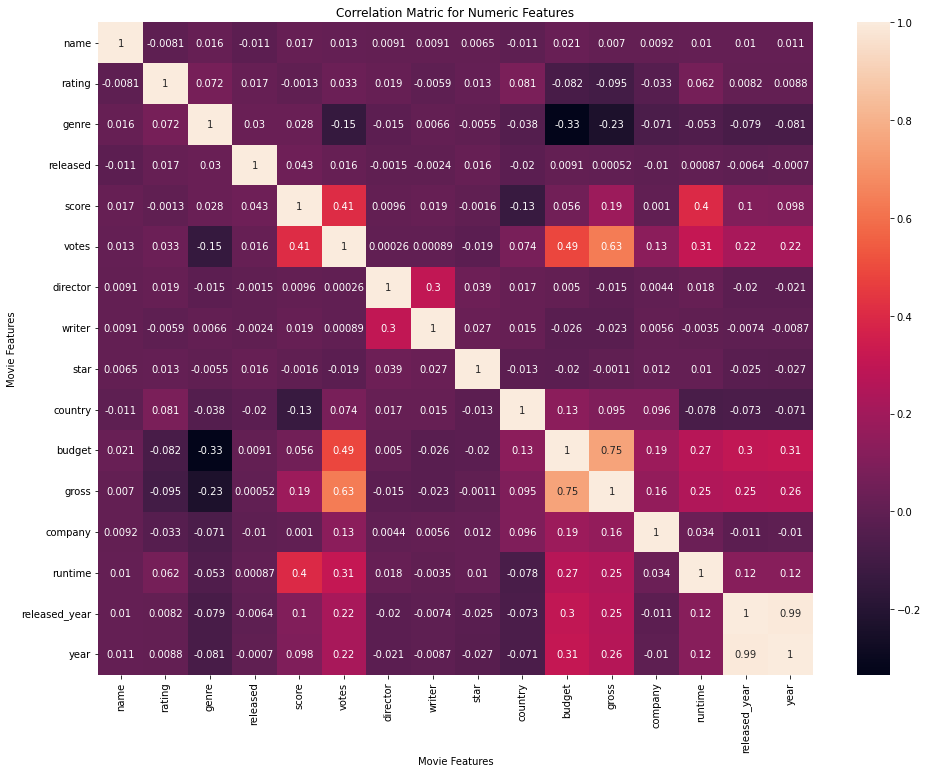

In [90]:
corr_matrix = df_numerized.corr()

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


In [99]:
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs

name           name             1.000000
rating         rating           1.000000
released_year  released_year    1.000000
runtime        runtime          1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
genre          genre            1.000000
year           year             1.000000
               released_year    0.990063
released_year  year             0.990063
gross          budget           0.750157
budget         gross            0.750157
votes          gross            0.632834
gross          votes            0.632834
budget         votes            0.486862
votes          budget           0.486862
               s

In [96]:
pd.set_option('display.max_rows', None)

In [103]:
sorted_pairs[sorted_pairs>0.5]

name           name             1.000000
rating         rating           1.000000
released_year  released_year    1.000000
runtime        runtime          1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
genre          genre            1.000000
year           year             1.000000
               released_year    0.990063
released_year  year             0.990063
gross          budget           0.750157
budget         gross            0.750157
votes          gross            0.632834
gross          votes            0.632834
dtype: float64

In [ ]:
# Vote and budget have the highest correlation to gross earning
# Company has low correlation